In [3]:
#-------------------------------------- Importing required libraries--------------------------------------------------# 

# We will import a package know as NUMPY
# This package helps us to do Mathematical operations
# Numpy will also help us in making ARRAYS
# We imported NUMPY with alias (np) which is known worldwide and it helps us in writing name of package in a short way.

import numpy as np

In [64]:
# We will import Package known as PANDAS.
# PANDAS Package will help us in Data Analysis and in building Data Structures.

import pandas as pd

In [9]:
# We will import package known as matplotlib.pyplot
# This package will help us in making quality charts in few lines of code

import matplotlib.pyplot as plt

In [10]:
#OS Package helps us to know about the where abouts of our Working Directory, changing it etc

import os

In [11]:
#This will let us know anout the current working directory
#Current working directory should be the one in which your files that needs to be imported for Data Analysis should be located

os.getcwd()

'C:\\Users\\hp'

In [112]:
#Using PANDAS package to read csv file.

df = pd.read_csv("AirPassengers.csv")

In [113]:
#DATAFRAME(DF) created
df1=df
df1

,Month,#Passengers
0,1949-01,224
1,1949-02,236
2,1949-03,264
3,1949-04,258
4,1949-05,242
5,1949-06,270
6,1949-07,296
7,1949-08,296
8,1949-09,272
9,1949-10,238


In [114]:
#Using length function to check the total number of rows


len(df1)

144

In [115]:
#Using length(df.columns) function to check the total number of columns

len(df1.columns)

2

In [116]:
#HEAD Function is used to get top values defined in the function

df1.head(5)

,Month,#Passengers
0,1949-01,224
1,1949-02,236
2,1949-03,264
3,1949-04,258
4,1949-05,242


In [117]:
#TAIL Function is used to get the values from the bottom.

df1.tail(5)

,Month,#Passengers
139,1960-08,1212
140,1960-09,1016
141,1960-10,922
142,1960-11,780
143,1960-12,864


In [105]:
#INFO fucntion is used to get information about the dataset what are the variable types etc.

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [118]:
#DESCRIBE Function is used to know about how data is populated what are the basic statistics of the DATAFRAME

df1.describe()

,#Passengers
count,144.000000
mean,560.597222
std,239.932634
min,208.000000
25%,360.000000
50%,531.000000
75%,721.000000
max,1244.000000


In [119]:
# This process will find out the number of missing values present in the dataset
df1.isnull().any
df1.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [120]:
#Convert Month object into datetime
df1['Month'] = pd.to_datetime(df1.Month)
df1.set_index(df1.Month,inplace=True)
df1.drop('Month', axis = 1, inplace = True)
df1.head()

,#Passengers
Month,
1949-01-01,224
1949-02-01,236
1949-03-01,264
1949-04-01,258
1949-05-01,242


In [121]:
#Convert it into time series
ts = df1['#Passengers']
ts.head()

Month
1949-01-01    224
1949-02-01    236
1949-03-01    264
1949-04-01    258
1949-05-01    242
Name: #Passengers, dtype: int64

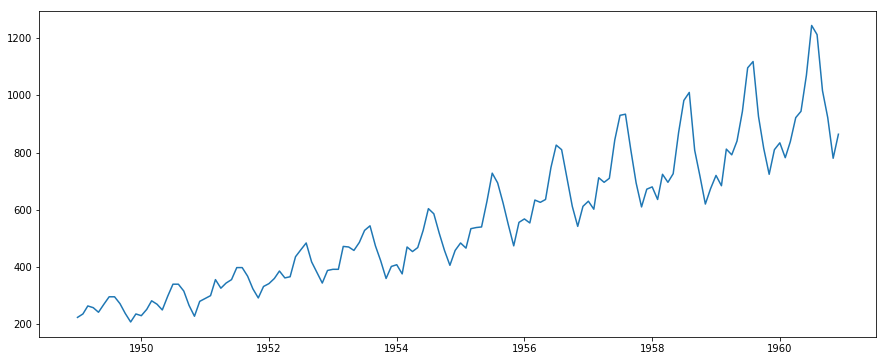

In [122]:
#1. Check for Stationarity of Time Series

#A Time Series is said to be stationary if its mean, variance remain constant over time 
#and an autocovariance that does not depend on time.

#Here we find out the stationarity off series using visualization and ADF test.

from matplotlib.pylab import rcParams #rcParams function handle all default values.
rcParams['figure.figsize'] = 15,6
plt.plot(ts)

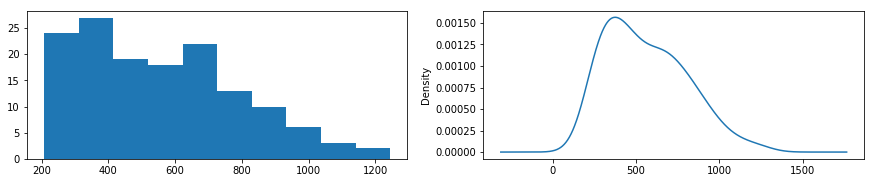

In [123]:
plt.subplot(221)
plt.hist(ts)
plt.subplot(222)
ts.plot(kind = 'kde')

In [25]:
#As from plot 1 we can see that graph showing an upward trend and in plot 2 summary statistics should be consistent with time 
#but it is not conistentent.So the series is not stationary.


In [101]:
#To Further confirm about non stationarity we will use Dickey-Fuller test results.


#Null Hypothesis:
#p-value>0.05
#time series is not stationary.

#Alternative Hypothesis:
#p-value<=0.05
#time series is stationary.



In [124]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
p-value: 0.991880


In [204]:
#As per adf test p-value>0.05 which means the series is not stationary.

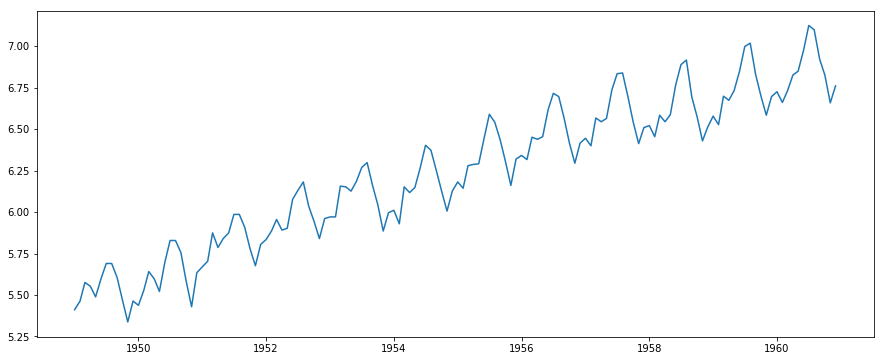

In [125]:

#let's take a log of the series
ts_log = np.log(ts)
plt.plot(ts_log)

In [126]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts_log.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.717017
p-value: 0.422367


In [196]:
#on taking log of the series,still the series is non stationary as p-value>0.05.

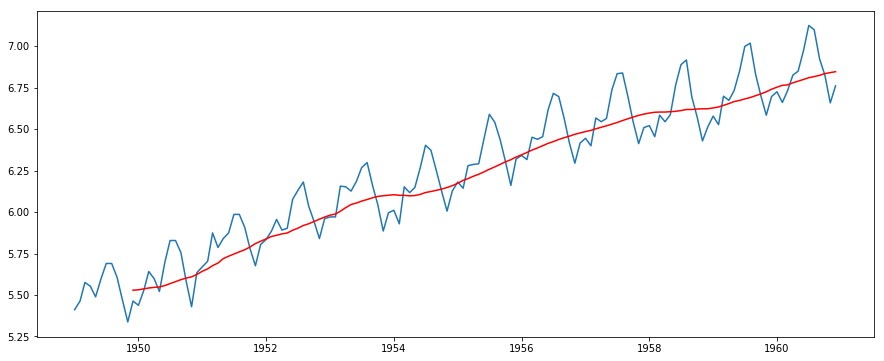

In [127]:
moving_Avg=pd.Series(ts_log).rolling( window=12).mean()
plt.plot(ts_log)
plt.plot(moving_Avg,color='red')

In [128]:
ts_log_moving_avg_diff=ts_log-moving_Avg
ts_log_moving_avg_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
1951-03-01    0.197694
1951-04-01    0.093955
1951-05-01    0.121101
1951-06-01    0.140570
                ...   
1958-07-01    0.276817
1958-08-01    0.298412
1958-09-01    0.075268
1958-10-01   -0.045657
1958-11-01   -0.193762
1958-12-01   -0.110499
1959-01-01   -0.049241
1959-02-01   -0.106598
1959-03-01    0.055385
1959-04-01    0.019679
1959-05-01    0.066365
1959-06-01    0.176286
1959-

In [129]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

In [130]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts_log_moving_avg_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.162908
p-value: 0.022235


In [ ]:
As p-value<0.05 so the series is now stationary

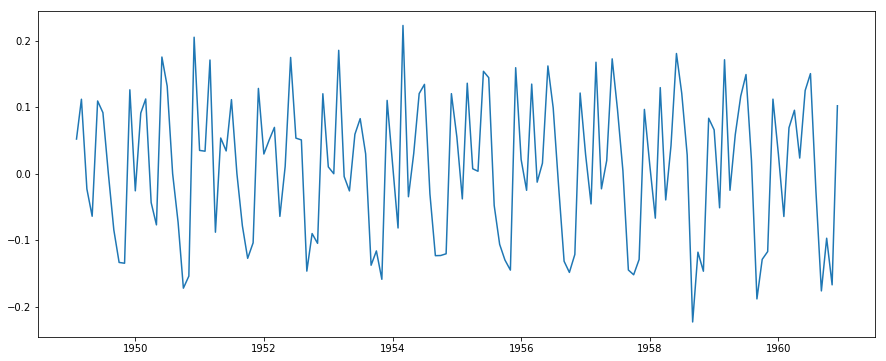

In [131]:


#let's take a log with 1st order of differencing
ts_Log_diff = ts_log-ts_log.shift()
ts_Log_diff.dropna(inplace=True)
plt.plot(ts_Log_diff)

In [132]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts_Log_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.717131
p-value: 0.071121


In [35]:
#As p-value is 0.07>0.05,so series is still not stationary.

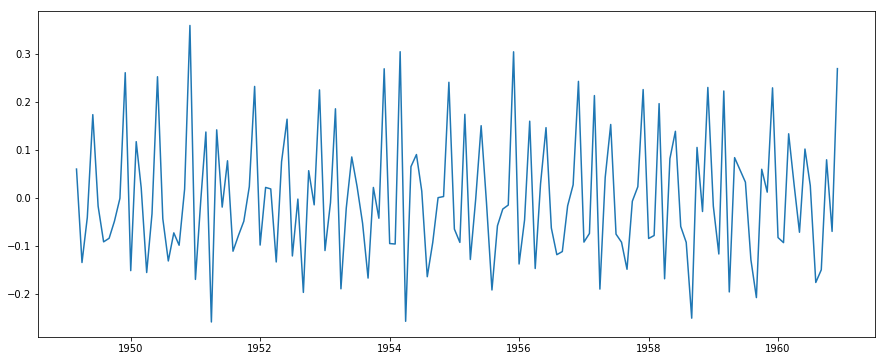

In [133]:
#Lets take a log with second order of differencing 
ts_Log_diff_diff = ts_Log_diff-ts_Log_diff.shift()
ts_Log_diff_diff.dropna(inplace=True)
plt.plot(ts_Log_diff_diff)

In [134]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts_Log_diff_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.196629
p-value: 0.000000


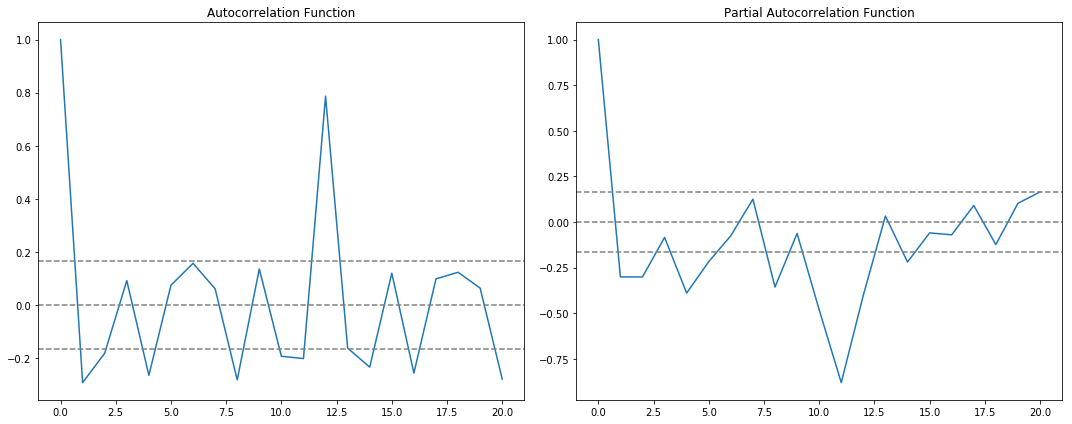

In [141]:
#ACF and PACF plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_Log_diff_diff, nlags=20)
lag_pacf = pacf(ts_Log_diff_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(ts_Log_diff_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_Log_diff_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_Log_diff_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_Log_diff_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In [ ]:
#In this plot, the two dotted lines on either sides of 0 are the confidence interevals.
#These can be used to determine the ‘p’ and ‘q’ values as:

#p – The lag value where the PACF chart crosses the upper confidence interval for the first time (p=2).

#q – The lag value where the ACF chart crosses the upper confidence interval for the first time(q=2).

#Now, lets make 3 different ARIMA models considering individual as well as combined effects. 
#We will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

#We need to load the ARIMA model first:



C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

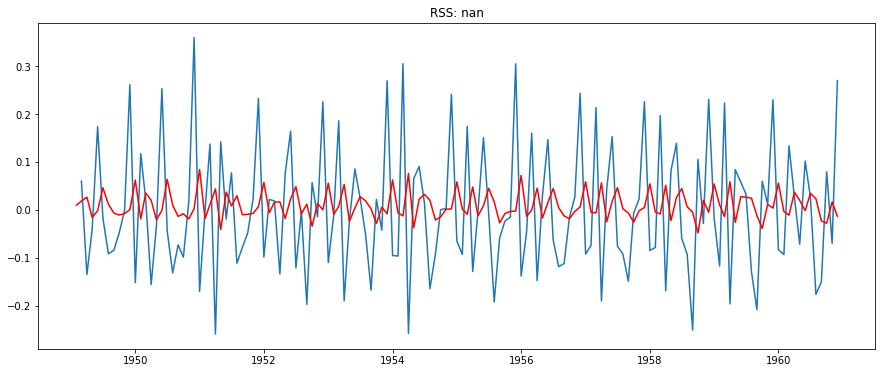

In [142]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
#AR Model
model = ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(ts_Log_diff_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_Log_diff_diff)**2)) #Residual sum of squares

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

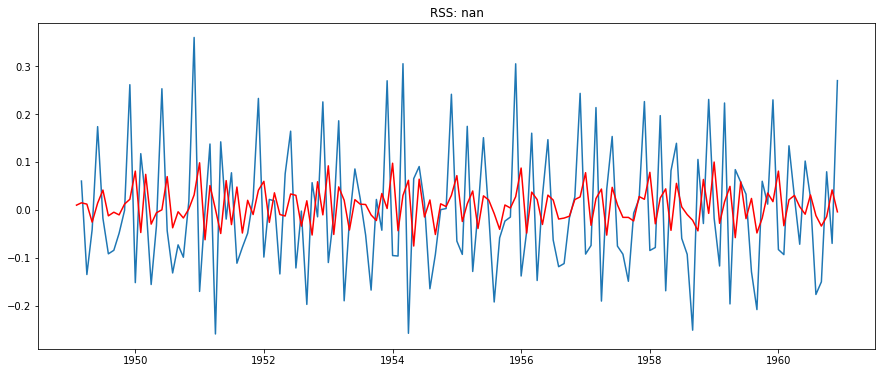

In [143]:
#MA Model
model = ARIMA(ts_log, order= (0, 1, 2))  
results_MA = model.fit(disp = -1)  
plt.plot(ts_Log_diff_diff)
plt.plot(results_MA.fittedvalues, color= 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_Log_diff_diff)**2))

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

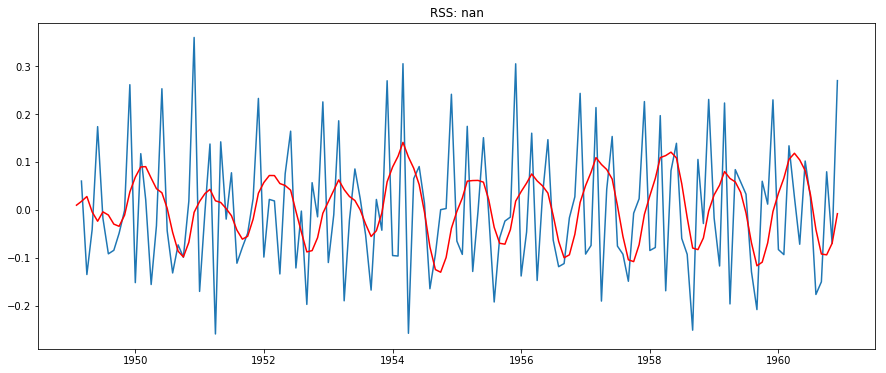

In [82]:
#Combined Model
model = ARIMA(ts_log, order = (2, 1, 2))  
results_ARIMA = model.fit(disp = -1)  
plt.plot(ts_Log_diff_diff)
plt.plot(results_ARIMA.fittedvalues, color= 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_Log_diff_diff)**2))


In [144]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [145]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [146]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    5.411646
1949-02-01    5.421226
1949-03-01    5.438718
1949-04-01    5.466388
1949-05-01    5.461867
dtype: float64

Text(0.5, 1.0, 'RMSE: 180.2087')

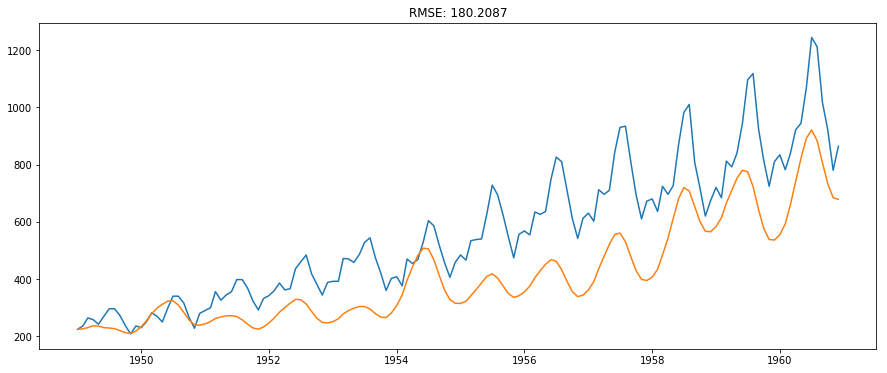

In [147]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
